<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.408369,34.769875,-0.001029,86.177215,86.178218,-0.001003
1,0.0,1.0,62.827569,97.337727,-0.000019,170.165277,170.165214,0.000064
2,0.0,2.0,33.025638,68.888371,0.000075,111.914084,111.913921,0.000162
3,0.0,3.0,44.786669,32.893603,0.000319,87.680590,87.680253,0.000337
4,0.0,4.0,36.939066,33.388312,0.000559,80.327937,80.327347,0.000590
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.770168,20.634167,0.004397,70.408733,70.405507,0.003226
19996,999.0,16.0,97.939255,57.958151,0.000062,165.897468,165.897527,-0.000060
19997,999.0,17.0,51.789118,83.067324,-0.000088,144.856354,144.856381,-0.000026
19998,999.0,18.0,77.214408,99.903539,0.000060,187.118007,187.117416,0.000590


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.408369,34.769875,-0.001029,86.177215,86.178218,-0.001003
1,0.0,1.0,62.827569,97.337727,-0.000019,170.165277,170.165214,0.000064
2,0.0,2.0,33.025638,68.888371,0.000075,111.914084,111.913921,0.000162
3,0.0,3.0,44.786669,32.893603,0.000319,87.680590,87.680253,0.000337
4,0.0,4.0,36.939066,33.388312,0.000559,80.327937,80.327347,0.000590
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.770168,20.634167,0.004397,70.408733,70.405507,0.003226
19996,999.0,16.0,97.939255,57.958151,0.000062,165.897468,165.897527,-0.000060
19997,999.0,17.0,51.789118,83.067324,-0.000088,144.856354,144.856381,-0.000026
19998,999.0,18.0,77.214408,99.903539,0.000060,187.118007,187.117416,0.000590


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.408369  34.769875 -0.001029   86.177215   86.178218 -0.001003
      1.0    62.827569  97.337727 -0.000019  170.165277  170.165214  0.000064
      2.0    33.025638  68.888371  0.000075  111.914084  111.913921  0.000162
      3.0    44.786669  32.893603  0.000319   87.680590   87.680253  0.000337
      4.0    36.939066  33.388312  0.000559   80.327937   80.327347  0.000590
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.770168  20.634167  0.004397   70.408733   70.405507  0.003226
      16.0   97.939255  57.958151  0.000062  165.897468  165.897527 -0.000060
      17.0   51.789118  83.067324 -0.000088  144.856354  144.856381 -0.000026
      18.0   77.214408  99.903539  0.000060  187.118007  187.117416  0.000590
      19.0   88.456939  33.252493 -0.000649  131.708783  131.710071 -0.001288

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.408369  34.769875 -0.001029   86.177215   86.178218 -0.001003
      1.0    62.827569  97.337727 -0.000019  170.165277  170.165214  0.000064
      2.0    33.025638  68.888371  0.000075  111.914084  111.913921  0.000162
      3.0    44.786669  32.893603  0.000319   87.680590   87.680253  0.000337
      4.0    36.939066  33.388312  0.000559   80.327937   80.327347  0.000590
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.770168  20.634167  0.004397   70.408733   70.405507  0.003226
      16.0   97.939255  57.958151  0.000062  165.897468  165.897527 -0.000060
      17.0   51.789118  83.067324 -0.000088  144.856354  144.856381 -0.000026
      18.0   77.214408  99.903539  0.000060  187.118007  187.117416  0.000590
      19.0   88.456939  33.252493 -0.000649  131.708783  131.710071 -0.001288

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.408369,34.769875,-0.001029,86.177215,86.178218,-0.001003
1,0.0,1.0,62.827569,97.337727,-0.000019,170.165277,170.165214,0.000064
2,0.0,2.0,33.025638,68.888371,0.000075,111.914084,111.913921,0.000162
3,0.0,3.0,44.786669,32.893603,0.000319,87.680590,87.680253,0.000337
4,0.0,4.0,36.939066,33.388312,0.000559,80.327937,80.327347,0.000590
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.770168,20.634167,0.004397,70.408733,70.405507,0.003226
19996,999.0,16.0,97.939255,57.958151,0.000062,165.897468,165.897527,-0.000060
19997,999.0,17.0,51.789118,83.067324,-0.000088,144.856354,144.856381,-0.000026
19998,999.0,18.0,77.214408,99.903539,0.000060,187.118007,187.117416,0.000590


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.408369  34.769875 -0.001029   86.177215   86.178218 -0.001003
      1.0    62.827569  97.337727 -0.000019  170.165277  170.165214  0.000064
      2.0    33.025638  68.888371  0.000075  111.914084  111.913921  0.000162
      3.0    44.786669  32.893603  0.000319   87.680590   87.680253  0.000337
      4.0    36.939066  33.388312  0.000559   80.327937   80.327347  0.000590
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.770168  20.634167  0.004397   70.408733   70.405507  0.003226
      16.0   97.939255  57.958151  0.000062  165.897468  165.897527 -0.000060
      17.0   51.789118  83.067324 -0.000088  144.856354  144.856381 -0.000026
      18.0   77.214408  99.903539  0.000060  187.118007  187.117416  0.000590
      19.0   88.456939  33.252493 -0.000649  131.708783  131.710071 -0.001288

[20000 rows x 6 columns]

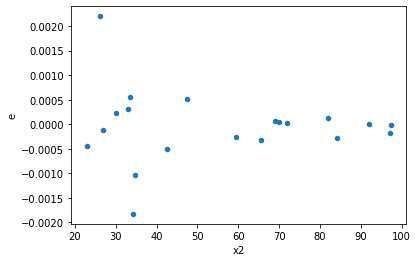

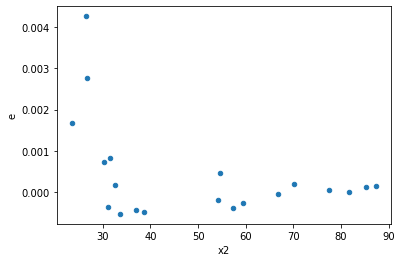

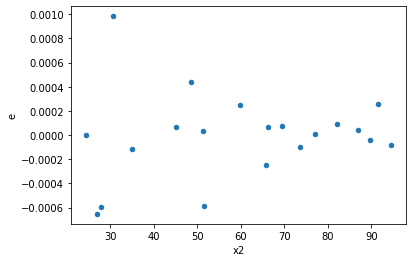

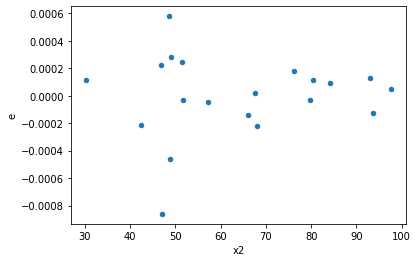

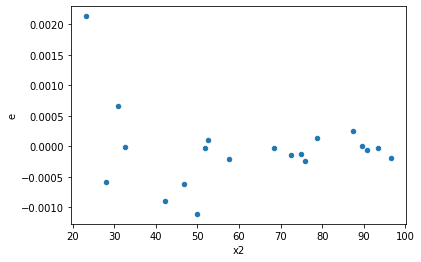

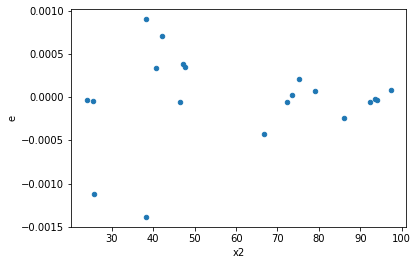

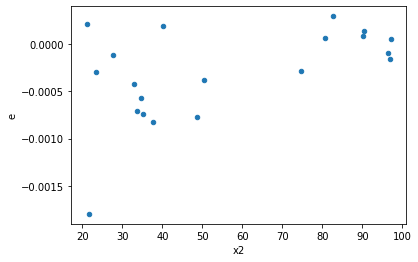

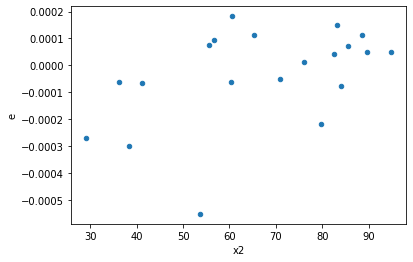

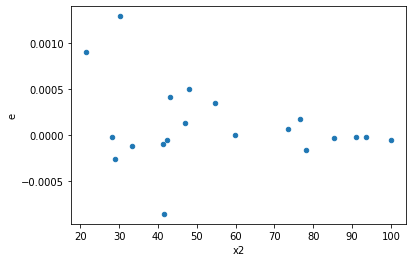

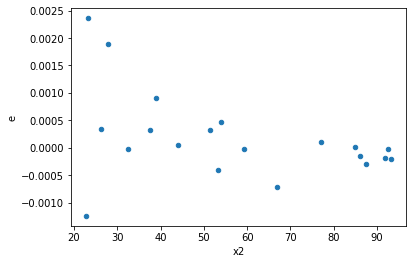

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,1.9806790716809335e-06,3.5009506962618644e-06,3.3011317861348894e-07,5.834917827103108e-07,1.767550708399584,0.5060385980960005,0.7469807009519998,0.25301929904800025,Reject001=1 : Homoscedasticity
14.0,6.0,6.0,3.5752940741064333e-06,1.2765579959662645e-05,5.958823456844056e-07,2.1275966599437743e-06,3.5704978933385005,0.1467461448903986,0.9266269275548007,0.0733730724451993,Reject001=1 : Homoscedasticity
19.0,6.0,6.0,8.431408723059976e-08,1.8538703303039742e-07,1.4052347871766627e-08,3.089783883839957e-08,2.198767004656793,0.36034572419425714,0.8198271379028714,0.18017286209712857,Reject001=1 : Homoscedasticity
33.0,6.0,6.0,8.598360235729102e-07,1.8935963802550126e-06,1.4330600392881838e-07,3.155993967091688e-07,2.202276164688329,0.35939712800895673,0.8203014359955216,0.17969856400447837,Reject001=1 : Homoscedasticity
50.0,6.0,6.0,2.1875194987851488e-07,2.535596189472101e-07,3.6458658313085816e-08,4.225993649120168e-08,1.1591193545384433,0.8623187293435404,0.5688406353282298,0.4311593646717702,Reject001=1 : Homoscedasticity
53.0,6.0,6.0,7.312423572581349e-07,7.382964411310746e-07,1.2187372620968916e-07,1.230494068551791e-07,1.0096467112482237,0.9909997584936834,0.5045001207531583,0.4954998792468417,Reject001=1 : Homoscedasticity
62.0,6.0,6.0,1.507723434654193e-07,2.5190605706312246e-07,2.5128723910903216e-08,4.1984342843853745e-08,1.670770986728736,0.5485168377922971,0.7257415811038515,0.27425841889614855,Reject001=1 : Homoscedasticity
69.0,6.0,6.0,1.02533332333282e-06,3.0358478482687036e-06,1.7088888722213667e-07,5.059746413781172e-07,2.9608399329115302,0.2122793233949507,0.8938603383025246,0.10613966169747535,Reject001=1 : Homoscedasticity
87.0,6.0,6.0,6.027251722753555e-07,1.659033536942175e-06,1.0045419537922591e-07,2.7650558949036253e-07,2.7525539221783895,0.24332103527659177,0.8783394823617041,0.12166051763829588,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1.9806790716809335e-06,3.5009506962618644e-06,3.3011317861348894e-07,5.834917827103108e-07,1.767550708399584,0.5060385980960005,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,6.553412067199739e-06,8.381760038907513e-07,1.0922353445332898e-06,1.3969600064845855e-07,0.12789917607743265,0.0244269983812893,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,2.227348065068686e-06,2.109873212507999e-07,3.7122467751144764e-07,3.516455354179998e-08,0.09472579726523056,0.01133384155253638,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,7.063782470804552e-07,7.073089487446686e-08,1.1772970784674254e-07,1.178848247907781e-08,0.10013175684104941,0.013096432954066104,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,5.3089091124466304e-06,5.534734660179725e-08,8.848181854077717e-07,9.22455776696621e-09,0.010425370905679384,2.1629475317670476e-05,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,2.8093865947241204e-06,2.567267950014754e-07,4.6823109912068676e-07,4.2787799166912565e-08,0.09138179682482814,0.010315150113153199,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,1.9211458820221003e-06,1.8370003547490478e-07,3.201909803370167e-07,3.0616672579150794e-08,0.0956200344773149,0.011615507885271463,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,9.34095104303705e-08,6.952407991867263e-08,1.5568251738395084e-08,1.1587346653112105e-08,0.7442933765346882,0.729044919983021,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,1.90994816674727e-06,7.063223797094984e-08,3.183246944578783e-07,1.1772039661824973e-08,0.036981232894523944,0.0008592806142453235,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    566
Reject001=1 : Homoscedasticity      434
Name: Result_test, dtype: int64